In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import os

In [29]:
file_path = r"C:\Users\osbar\OneDrive\Área de Trabalho\Global Solution IA\sea_levels_2015.csv"

df_Sea = pd.read_csv(file_path,parse_dates=['Time'],dayfirst=False)
df_Sea['Time'] = pd.to_datetime(df_Sea['Time'], format='%y-%m-%d')

df_Sea.head()

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2


<Axes: xlabel='Time', ylabel='GMSL'>

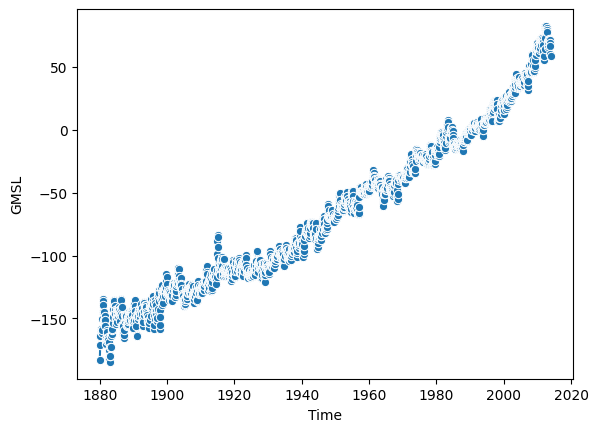

In [37]:

sb.lineplot(data=df_Sea, x='Time', y='GMSL', marker='o')


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(df_Sea.Time,df_Sea.GMSL)

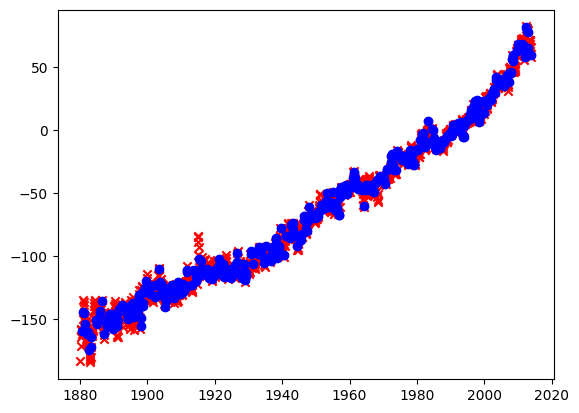

In [43]:
plt.scatter(X_train, Y_train, marker='x',color='r',label='Training')
plt.scatter(X_test, Y_test, marker='o',color='b',label='Test')

In [56]:
LR = LinearRegression()
X_train_numerical = X_train.apply(lambda x: x.toordinal() if hasattr(x, 'toordinal') else x).values.reshape(-1, 1)
LR.fit(X_train_numerical,Y_train.values)

LinearRegression()

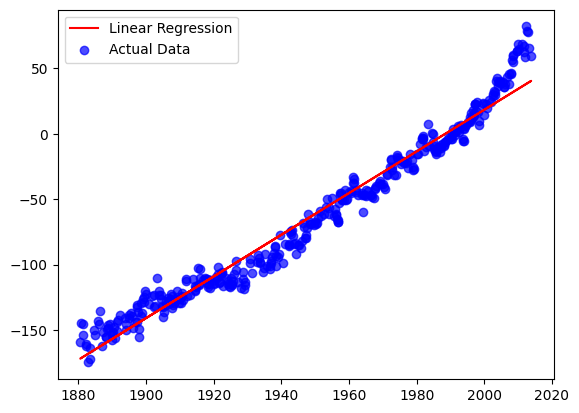

In [58]:
X_test_numerical = X_test.apply(lambda x: x.toordinal() if hasattr(x, 'toordinal') else x).values.reshape(-1, 1)

prediction = LR.predict(X_test_numerical)

plt.plot(X_test, prediction, label='Linear Regression',color='r')
plt.scatter(X_test, Y_test, label='Actual Data',color='b',alpha=.7)
plt.legend()
plt.show()

In [64]:
LR.score(X_test_numerical,Y_test.values)

0.9684984934508757